In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data Preprocessing

Training Image preprocessing




In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Validation image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17573 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 81.    75.    88.  ]
   [ 80.25  73.    87.25]
   [ 75.25  69.25  82.25]
   ...
   [ 88.75  83.    85.75]
   [ 81.25  74.5   84.  ]
   [ 83.75  77.25  90.75]]

  [[153.   144.   162.  ]
   [152.75 143.75 161.75]
   [154.   145.   163.  ]
   ...
   [173.75 165.25 181.25]
   [172.75 163.75 183.25]
   [175.75 166.   189.25]]

  [[162.75 153.25 175.75]
   [165.75 156.25 178.75]
   [148.25 138.75 161.25]
   ...
   [168.25 158.75 180.75]
   [174.   165.25 183.25]
   [166.   157.5  173.5 ]]

  ...

  [[148.75 138.75 163.75]
   [143.5  133.5  158.5 ]
   [141.75 131.75 156.75]
   ...
   [170.75 157.75 167.75]
   [156.5  143.5  153.5 ]
   [160.25 147.25 157.25]]

  [[146.   136.   161.  ]
   [143.5  133.5  158.5 ]
   [138.5  128.5  153.5 ]
   ...
   [167.   154.   164.  ]
   [157.5  144.5  154.5 ]
   [157.75 144.75 154.75]]

  [[148.75 138.75 163.75]
   [148.25 138.25 163.25]
   [137.5  127.5  152.5 ]
   ...
   [165.25 152.25 162.25]
   [159.75 146.75 156.75]
   [160.5  147.5  15

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

Building Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [6]:
model = Sequential()

Building Convolution layer

In [7]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same' , activation = 'relu' , input_shape = [128, 128, 3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu' ))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [8]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same' , activation = 'relu' ))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu' ))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [9]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu' ))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [10]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3,activation = 'relu' ))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same' , activation = 'relu' ))
model.add(Conv2D(filters = 512, kernel_size = 3,activation = 'relu' ))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Dropout(0.25)) ##to avoid overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units = 1500, activation = 'relu' ))

In [15]:
model.add(Dropout(0.4)) 

Output Layer

In [16]:
model.add(Dense(units = 38, activation = 'softmax'))

Compiling the Model

In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = [ 'accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [19]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 50)

Epoch 1/50
2197/2197 [==============================] - 200s 87ms/step - loss: 1.3544 - accuracy: 0.6013 - val_loss: 0.4936 - val_accuracy: 0.8456
Epoch 2/50
2197/2197 [==============================] - 188s 86ms/step - loss: 0.4362 - accuracy: 0.8621 - val_loss: 0.2765 - val_accuracy: 0.9097
Epoch 3/50
2197/2197 [==============================] - 189s 86ms/step - loss: 0.2669 - accuracy: 0.9143 - val_loss: 0.2244 - val_accuracy: 0.9285
Epoch 4/50
2197/2197 [==============================] - 189s 86ms/step - loss: 0.1765 - accuracy: 0.9428 - val_loss: 0.1690 - val_accuracy: 0.9450
Epoch 5/50
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1334 - accuracy: 0.9568 - val_loss: 0.1670 - val_accuracy: 0.9451
Epoch 6/50
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1065 - accuracy: 0.9652 - val_loss: 0.1550 - val_accuracy: 0.9524
Epoch 7/50
2197/2197 [==============================] - 185s 84ms/step - loss: 0.0843 - accuracy: 0.9723 - val_loss: 0

### Evaluating Model


In [20]:
#Training set accuracy
train_loss, train_acc = model.evaluate(training_set)
print("Training accuracy :", train_acc)

2197/2197 [==============================] - 62s 28ms/step - loss: 0.0017 - accuracy: 0.9995
Training accuracy : 0.9995021224021912


In [21]:
#Validation set accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validatin accuracy :', val_acc)

550/550 [==============================] - 16s 28ms/step - loss: 0.0695 - accuracy: 0.9848
Validatin accuracy : 0.98480623960495


### Saving Model

In [22]:
model.save('trained_plant_disease_model.keras')

In [23]:
training_history.history

{'loss': [1.3544220924377441,
  0.436222642660141,
  0.2668997049331665,
  0.17648442089557648,
  0.13344982266426086,
  0.10652517527341843,
  0.08431945741176605,
  0.070011667907238,
  0.06332717835903168,
  0.05384776368737221,
  0.04481121152639389,
  0.04298911616206169,
  0.04100273549556732,
  0.03618820384144783,
  0.03610123693943024,
  0.03299744427204132,
  0.030969683080911636,
  0.02821202203631401,
  0.028518319129943848,
  0.026122508570551872,
  0.023393213748931885,
  0.023981865495443344,
  0.022242384031414986,
  0.02121838927268982,
  0.019633790478110313,
  0.020957978442311287,
  0.020595218986272812,
  0.019272828474640846,
  0.017588095739483833,
  0.01851094514131546,
  0.01742386259138584,
  0.01871485263109207,
  0.01473955437541008,
  0.01744830049574375,
  0.016409317031502724,
  0.015286986716091633,
  0.016642846167087555,
  0.013663233257830143,
  0.014558660797774792,
  0.01583021692931652,
  0.016314174979925156,
  0.012185225263237953,
  0.0150735275

In [24]:
#Recording history
import json 
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Accuracy Visualization

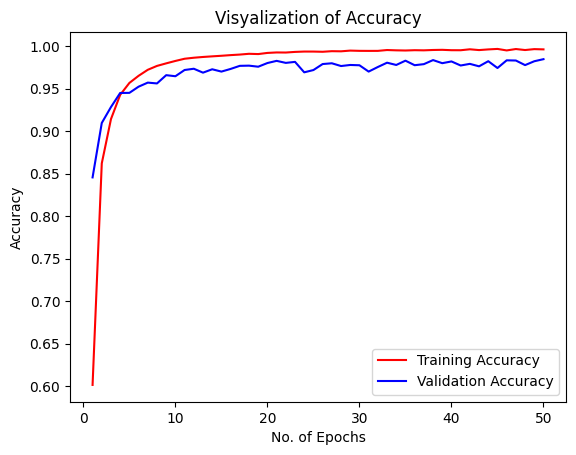

In [26]:
epochs = [i for i in range (1,51)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Visyalization of Accuracy')
plt.show()

### Some other Metrics for Model Evaluation

In [27]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17573 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis = 1)

17573/17573 [==============================] - 62s 3ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis = 0)
Y_true = tf.argmax(true_categories, axis = 1)

In [31]:
Y_true

<tf.Tensor: shape=(17573,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(17573,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

### Classification Report / Precision Recall

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)

In [34]:
#Precision Recall FScore

print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      0.99       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       441
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.93      0.95       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.97      0.

### Confusion Matrix

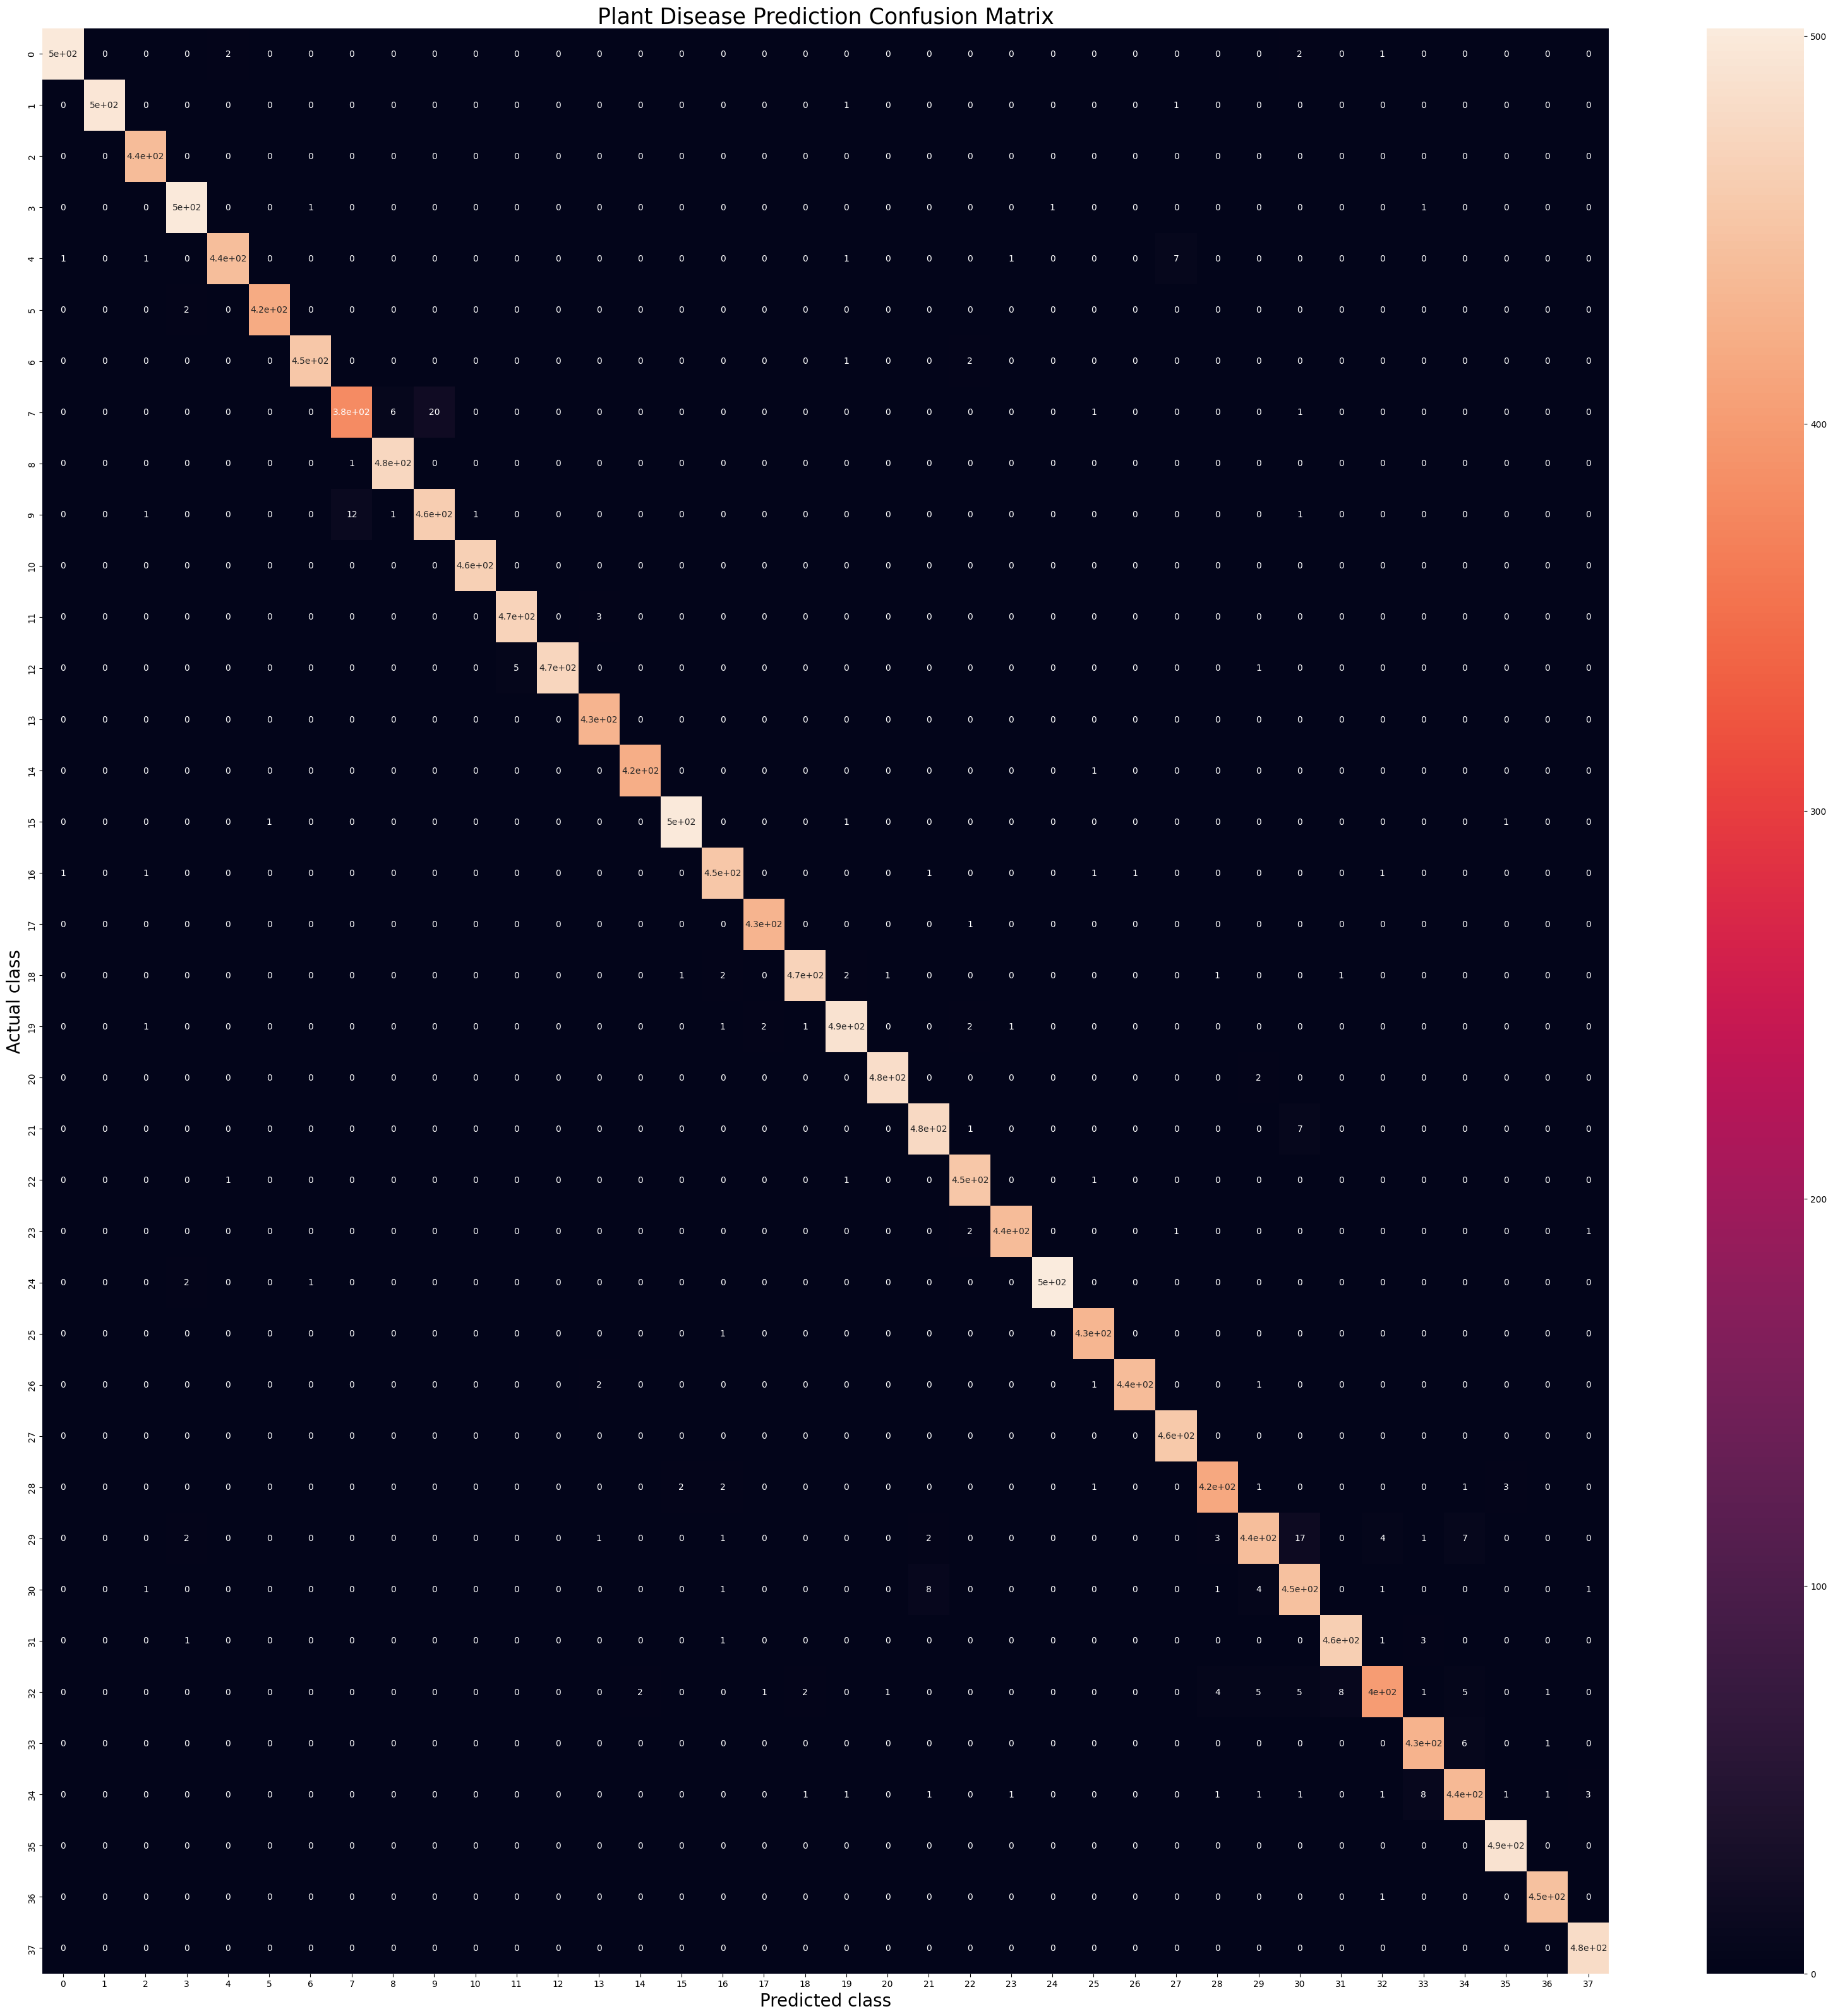

In [35]:
plt.figure(figsize = (40, 40))
sns.heatmap(cm, annot = True, annot_kws = {"size" : 10 })

plt.xlabel('Predicted class', fontsize = 20)
plt.ylabel('Actual class', fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize = 25)
plt.show()